In [1]:
!pip install jedi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 569.6 kB/s eta 0:00:004.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:01:01


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns
import numpy as np
import math

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()
#df['Embarked'].unique()
#df['Cabin'].unique()
#df['Cabin'] = df['Cabin'].fillna('D')
#df['Cabin'] = df['Cabin'].str[0]
#df['Cabin'].unique().
#(df['SibSp'] * df['Parch']).unique()
#df['Cabin'].str.len().unique()
#df['Name'].str.extract(r"(Mr\.|Mrs\.|Miss\.|Ms\.|Rev\.|Master\.|Don\.|Dr\.|Mme\.|Major\.|Mlle\.|Sir\.|Col\.|Capt\.|Countess\.|Jonkheer\.)")
#df['Name']
pd.set_option('max_rows', 30)
#df['Name']

In [5]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
#scaler = MaxAbsScaler()

In [7]:
# axis = 0: rows, axis = 1: columns
#X = df.drop('Survived', axis = 1)
#X['Age'] = X['Age'].fillna(0)
#X[X['Age'] == 0]
df['Age'].median()

28.0

In [8]:
#sns.pairplot(df)

In [59]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.assign(SibSp_Times_Parch = df['SibSp'] * df['Parch'])
df = df.assign(Treatment_Pronoun = df['Name'].str.extract(r"(Mr\.|Mrs\.|Miss\.|Ms\.|Rev\.|Master\.|Don\.|Dr\.|Mme\.|Major\.|Mlle\.|Sir\.|Col\.|Capt\.|Countess\.|Jonkheer\.)"))
df = df.assign(Wage_Per_Person = df['Fare'] / (1 + df['SibSp'] + df['Parch']))
df = df.assign(Name_Size = df['Name'].str.len())
df = df.assign(Fare_Squared = df['Fare'] * df['Fare'])
df = df.assign(Fare_Squared_By_Age = df['Fare_Squared'] / df['Age'])
df = df.assign(Portion_Life = df['Age'] / 40)
X = df[['Pclass', 'Sex', 'Age', 'Portion_Life', 'SibSp', 'Parch', 'Embarked', 'Cabin', 'SibSp_Times_Parch', 'Fare', 'Fare_Squared_By_Age', 'Wage_Per_Person', 'Fare_Squared', 'Name_Size', 'Treatment_Pronoun']]
X = pd.get_dummies(X)
#scaler.fit(X)
#scaled = scaler.transform(X)
#scaled_X = pd.DataFrame(scaled, columns = X.columns)
#finalX = scaled_X
final_X = X
final_X

,Pclass,Age,Portion_Life,SibSp,Parch,SibSp_Times_Parch,Fare,Fare_Squared_By_Age,Wage_Per_Person,Fare_Squared,...,Treatment_Pronoun_Major.,Treatment_Pronoun_Master.,Treatment_Pronoun_Miss.,Treatment_Pronoun_Mlle.,Treatment_Pronoun_Mme.,Treatment_Pronoun_Mr.,Treatment_Pronoun_Mrs.,Treatment_Pronoun_Ms.,Treatment_Pronoun_Rev.,Treatment_Pronoun_Sir.
0,3,22.0,0.550,1,0,0,7.2500,2.389205,3.62500,52.562500,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,0.950,1,0,0,71.2833,133.718654,35.64165,5081.308859,...,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0.650,0,0,0,7.9250,2.415601,7.92500,62.805625,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,0.875,1,0,0,53.1000,80.560286,26.55000,2819.610000,...,0,0,0,0,0,0,1,0,0,0
4,3,35.0,0.875,0,0,0,8.0500,1.851500,8.05000,64.802500,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0.675,0,0,0,13.0000,6.259259,13.00000,169.000000,...,0,0,0,0,0,0,0,0,1,0
887,1,19.0,0.475,0,0,0,30.0000,47.368421,30.00000,900.000000,...,0,0,1,0,0,0,0,0,0,0
888,3,28.0,0.700,1,2,2,23.4500,19.639375,5.86250,549.902500,...,0,0,1,0,0,0,0,0,0,0
889,1,26.0,0.650,0,0,0,30.0000,34.615385,30.00000,900.000000,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

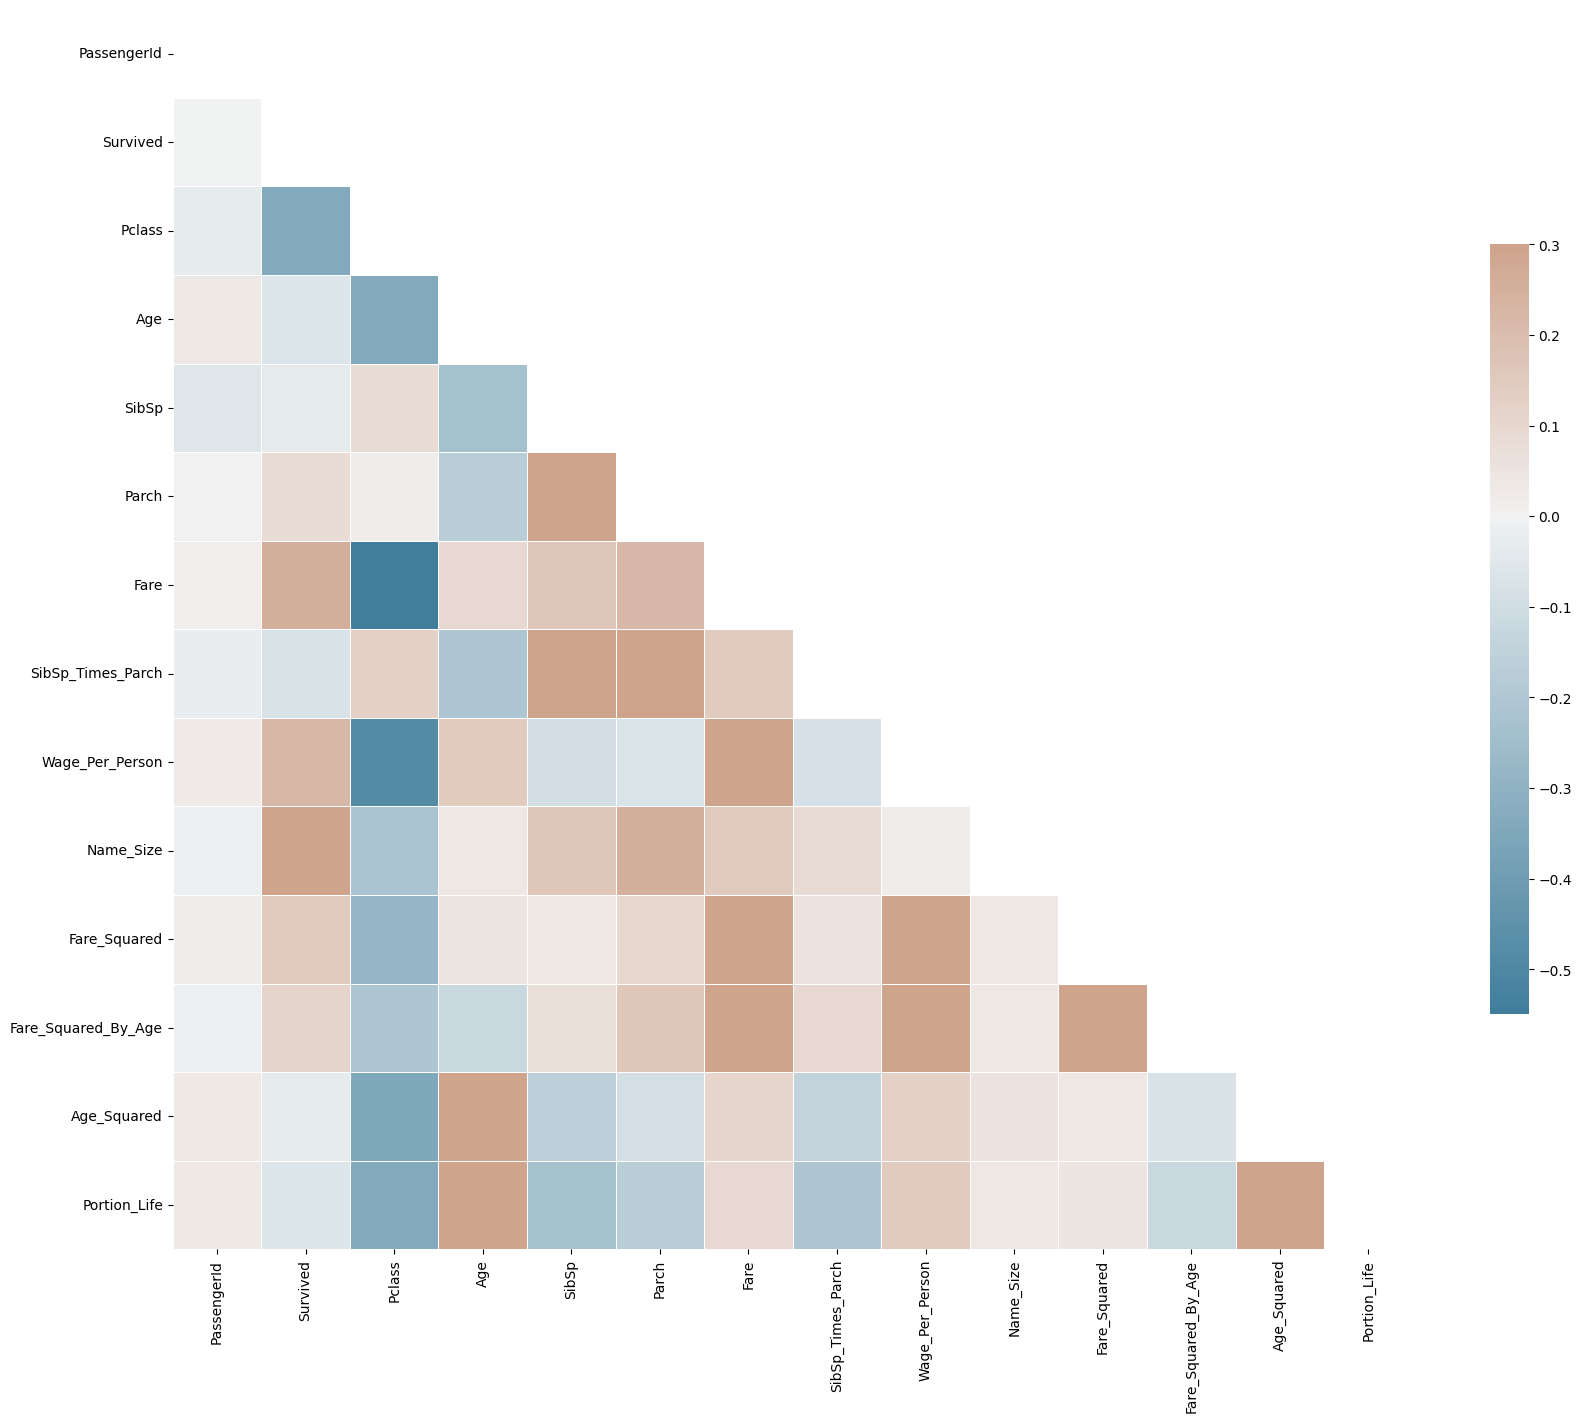

In [60]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 30, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)

In [50]:
#sns.pairplot(final_X)

In [51]:
#clf = LogisticRegression(random_state = 0) #2nd
#clf = GaussianNB() #4th
clf = RandomForestClassifier(max_depth = 13, random_state = 0) #1st
#clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(50, 50), random_state=1) #3rd
#clf = SVC(gamma = 'auto')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, random_state=0)

In [52]:
y_predicted = clf.predict(X_test)

In [53]:
# Observe that the result is equal to clf.score(X_test, y_test). How accuracy is with test data?
res = y_predicted == y_test
hits = 0
for cur in res:
    if cur:
        hits += 1
        
print(hits / len(res))

0.8324022346368715


In [54]:
clf.score(X_train, y_train)

0.9480337078651685

In [55]:
clf.score(X_test, y_test)

0.8324022346368715

In [28]:
# Model: Logistic Regression
# Feature: [Pclass]
# Training Score: 0.669
# Testing Score: 0.698

# Features: [Pclass, Sex_female, Sex_male]
# Training Score: 0.781
# Testing Score: 0.796

# Features: [Pclass, Sex_female, Sex_male, Age]
# Training Score: 0.788
# Testing Score: 0.816

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp]
# Training Score: 0.788
# Testing Score: 0.823

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch]
# Training Score: 0.790
# Testing Score: 0.833

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Embarked]
# Training Score: 0.800
# Testing Score: 0.816

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Embarked, Cabin]
# Training Score: 0.800
# Testing Score: 0.820

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Embarked, Cabin, SibSp + Parch]
# Training Score: 0.802
# Testing Score: 0.823

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Embarked, Cabin, SibSp + Parch]
# Training Score: 0.802
# Testing Score: 0.823

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp + Parch]
# Training Score: 0.802
# Testing Score: 0.820

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch]
# Training Score: 0.810
# Testing Score: 0.820

# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare]
# Training Score: 0.802
# Testing Score: 0.810

# Com dados normalizados
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare]
# Training Score: 0.802
# Testing Score: 0.803

# Com dados normalizados
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare, Tratment_Pronoun]
# Training Score: 0.827
# Testing Score: 0.820

# Sem dados normalizados e com income por pessoa
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare, Tratment_Pronoun]
# Training Score: 0.837
# Testing Score: 0.833

# Igual o de cima, mas com Naive Bayes
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare, Tratment_Pronoun]
# Training Score: 0.760
# Testing Score: 0.708
 
# Igual o de cima, mas com Random Forest
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare, Tratment_Pronoun]
# Training Score: 0.931
# Testing Score: 0.820

# Igual o de cima, mas com Random Forest e 25% dos dados para teste
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare, Tratment_Pronoun]
# Training Score: 0.940
# Testing Score: 0.838

# Igual o de cima, mas com Random Forest e 20% dos dados para teste
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare, Tratment_Pronoun]
# Training Score: 0.936
# Testing Score: 0.843

# Igual o de cima, mas com Redes Neurais (Multi Layer Perceptron) e 20% dos dados para teste
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare, Tratment_Pronoun]
# Training Score: 0.846
# Testing Score: 0.798

# Random Forest venceu
# Podemos melhorar seus parâmetros?
# Features: [Pclass, Sex_female, Sex_male, Age, SibSp, Parch, Cabin, SibSp * Parch, Fare, Tratment_Pronoun]
# Training Score: 0.936
# Testing Score: 0.843
# Teste 1: max_depth = 20
# Training Score: 0.983
# Testing Score: 0.837
# Obs: Parecce ter dado um overfit. Muito bem nos dados de treino, mas mais fraco nos dados de teste.
# Avançar com busca binária para max_depth
# Teste 2: max_depth = 15
# Training Score: 0.966
# Testing Score: 0.843
# Obs: A busca binária está meio desorientada porque comecei testando com 10. Fazer um teste com max-depth = 2 para avaliar melhor
# Teste 3: max_depth = 2
# Training Score: 0.806
# Testing Score: 0.798
# Agora sim, resultado ruim em 2, melhor em 20. Ao olhar o número em 10 (default), resultado melhor que em 20.
# Indo para 15, resultado ainda melhor porque tem menos overfit. Se aumentarmos para 17, vamos ter mais overfit. Então 
# Vamos executar com 13.
# Teste 4: max_depth = 13
# Training Score: 0.959
# Testing Score: 0.843
# Está mais estabilizado, talvez precisemos usar regularização para diminuir o overfit.

In [29]:
X.head()

,Pclass,Age,SibSp,Parch,SibSp_Times_Parch,Fare,Fare_Squared_By_Age,Wage_Per_Person,Fare_Squared,Name_Size,...,Treatment_Pronoun_Major.,Treatment_Pronoun_Master.,Treatment_Pronoun_Miss.,Treatment_Pronoun_Mlle.,Treatment_Pronoun_Mme.,Treatment_Pronoun_Mr.,Treatment_Pronoun_Mrs.,Treatment_Pronoun_Ms.,Treatment_Pronoun_Rev.,Treatment_Pronoun_Sir.
0,3,22.0,1,0,0,7.2500,2.389205,3.62500,52.562500,23,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,1,0,0,71.2833,133.718654,35.64165,5081.308859,51,...,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,0,7.9250,2.415601,7.92500,62.805625,22,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,0,53.1000,80.560286,26.55000,2819.610000,44,...,0,0,0,0,0,0,1,0,0,0
4,3,35.0,0,0,0,8.0500,1.851500,8.05000,64.802500,24,...,0,0,0,0,0,1,0,0,0,0


In [30]:
#clf = LogisticRegression(random_state = 0) #2nd
#clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(50, 50), random_state=1) #3rd
#clf = SVC(gamma = 'auto')
clf = RandomForestClassifier(max_depth = 13, random_state = 0)
clf.fit(final_X, y)

RandomForestClassifier(max_depth=13, random_state=0)

In [31]:
clf.score(final_X, y)

0.9405162738496072

In [32]:
test_df = pd.read_csv('data/test.csv')

In [33]:
test_df.head(100)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


In [34]:
test_df = test_df.assign(SibSp_Times_Parch = test_df['SibSp'] * test_df['Parch'])
test_df = test_df.assign(Treatment_Pronoun = test_df['Name'].str.extract(r"(Mr\.|Mrs\.|Miss\.|Ms\.|Rev\.|Master\.|Don\.|Dr\.|Mme\.|Major\.|Mlle\.|Sir\.|Col\.|Capt\.|Countess\.|Jonkheer\.)"))
test_df = test_df.assign(Wage_Per_Person = test_df['Fare'] / (1 + test_df['SibSp'] + test_df['Parch']))
test_df = test_df.assign(Name_Size = df['Name'].str.len())
test_df = test_df.assign(Fare_Squared = test_df['Fare'] * test_df['Fare'])
test_df = test_df.assign(Fare_Squared_By_Age = test_df['Fare_Squared'] / test_df['Age'])
test_df['Embarked'] = test_df['Embarked'].fillna('Unknown')
test_df['Cabin'] = test_df['Cabin'].fillna('D')
test_df['Cabin'] = test_df['Cabin'].str[0]
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['IsRich'] = test_df['Fare'] > 50
X_test_final = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Cabin', 'SibSp_Times_Parch', 'Fare', 'Wage_Per_Person', 'Fare_Squared', 'Name_Size', 'Treatment_Pronoun']]

X_test_final = pd.get_dummies(X_test_final)
X_test_final

,Pclass,Age,SibSp,Parch,SibSp_Times_Parch,Fare,Wage_Per_Person,Fare_Squared,Name_Size,Sex_female,...,Cabin_F,Cabin_G,Treatment_Pronoun_Col.,Treatment_Pronoun_Dr.,Treatment_Pronoun_Master.,Treatment_Pronoun_Miss.,Treatment_Pronoun_Mr.,Treatment_Pronoun_Mrs.,Treatment_Pronoun_Ms.,Treatment_Pronoun_Rev.
0,3,34.5,0,0,0,7.8292,7.829200,61.296373,23,0,...,0,0,0,0,0,0,1,0,0,0
1,3,47.0,1,0,0,7.0000,3.500000,49.000000,51,1,...,0,0,0,0,0,0,0,1,0,0
2,2,62.0,0,0,0,9.6875,9.687500,93.847656,22,0,...,0,0,0,0,0,0,1,0,0,0
3,3,27.0,0,0,0,8.6625,8.662500,75.038906,44,0,...,0,0,0,0,0,0,1,0,0,0
4,3,22.0,1,1,1,12.2875,4.095833,150.982656,24,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,0,8.0500,8.050000,64.802500,30,0,...,0,0,0,0,0,0,1,0,0,0
414,1,39.0,0,0,0,108.9000,108.900000,11859.210000,25,1,...,0,0,0,0,0,0,0,0,0,0
415,3,38.5,0,0,0,7.2500,7.250000,52.562500,39,0,...,0,0,0,0,0,0,1,0,0,0
416,3,27.0,0,0,0,8.0500,8.050000,64.802500,47,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
missing_cols = set( X_train.columns ) - set( X_test_final.columns )
#missing_cols
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test_final[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test_final = X_test_final[X_train.columns]
X_test_final = X_test_final.fillna(0)
X_test_final

/home/felipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


,Pclass,Age,SibSp,Parch,SibSp_Times_Parch,Fare,Fare_Squared_By_Age,Wage_Per_Person,Fare_Squared,Name_Size,...,Treatment_Pronoun_Major.,Treatment_Pronoun_Master.,Treatment_Pronoun_Miss.,Treatment_Pronoun_Mlle.,Treatment_Pronoun_Mme.,Treatment_Pronoun_Mr.,Treatment_Pronoun_Mrs.,Treatment_Pronoun_Ms.,Treatment_Pronoun_Rev.,Treatment_Pronoun_Sir.
0,3,34.5,0,0,0,7.8292,0,7.829200,61.296373,23,...,0,0,0,0,0,1,0,0,0,0
1,3,47.0,1,0,0,7.0000,0,3.500000,49.000000,51,...,0,0,0,0,0,0,1,0,0,0
2,2,62.0,0,0,0,9.6875,0,9.687500,93.847656,22,...,0,0,0,0,0,1,0,0,0,0
3,3,27.0,0,0,0,8.6625,0,8.662500,75.038906,44,...,0,0,0,0,0,1,0,0,0,0
4,3,22.0,1,1,1,12.2875,0,4.095833,150.982656,24,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,0,8.0500,0,8.050000,64.802500,30,...,0,0,0,0,0,1,0,0,0,0
414,1,39.0,0,0,0,108.9000,0,108.900000,11859.210000,25,...,0,0,0,0,0,0,0,0,0,0
415,3,38.5,0,0,0,7.2500,0,7.250000,52.562500,39,...,0,0,0,0,0,1,0,0,0,0
416,3,27.0,0,0,0,8.0500,0,8.050000,64.802500,47,...,0,0,0,0,0,1,0,0,0,0


In [36]:
y_predictions = clf.predict(X_test_final)

In [37]:
test_df['Survived'] = y_predictions

In [38]:
test_df[['PassengerId', 'Survived']].to_csv('data/test_predicted.csv', index = False)